In [117]:
import cv2
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import image_select
import matplotlib.pyplot as plt

In [222]:
image = 'train_img/t1.jpg'
X_train, y_train = image_select.prepare_train_data(image)

Obtaining plant parts...
Obtaining background parts...


In [223]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [224]:
model = Sequential()
model.add(Dense(512, activation='relu', kernel_initializer='normal', input_shape=(9,)))
model.add(Dense(16, activation='relu', kernel_initializer='normal', input_shape=(512,)))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [225]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               5120      
_________________________________________________________________
dense_40 (Dense)             (None, 16)                8208      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 17        
Total params: 13,345
Trainable params: 13,345
Non-trainable params: 0
_________________________________________________________________


In [226]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [227]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [228]:
y_train = y_train.astype(np.uint8)

In [229]:
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                   validation_split=0.01)

Train on 46167 samples, validate on 467 samples
Epoch 1/10
 - 1s - loss: 0.0741 - acc: 0.9941 - val_loss: 7.0617e-04 - val_acc: 1.0000
Epoch 2/10
 - 1s - loss: 0.0028 - acc: 0.9996 - val_loss: 7.7497e-04 - val_acc: 1.0000
Epoch 3/10
 - 1s - loss: 0.0026 - acc: 0.9996 - val_loss: 4.3980e-04 - val_acc: 1.0000
Epoch 4/10
 - 1s - loss: 0.0026 - acc: 0.9996 - val_loss: 1.1055e-04 - val_acc: 1.0000
Epoch 5/10
 - 1s - loss: 0.0026 - acc: 0.9996 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 6/10
 - 1s - loss: 0.0024 - acc: 0.9997 - val_loss: 3.2172e-04 - val_acc: 1.0000
Epoch 7/10
 - 1s - loss: 0.0026 - acc: 0.9996 - val_loss: 1.6805e-04 - val_acc: 1.0000
Epoch 8/10
 - 1s - loss: 0.0025 - acc: 0.9996 - val_loss: 1.6480e-04 - val_acc: 1.0000
Epoch 9/10
 - 1s - loss: 0.0025 - acc: 0.9996 - val_loss: 4.4563e-04 - val_acc: 1.0000
Epoch 10/10
 - 1s - loss: 0.0024 - acc: 0.9996 - val_loss: 0.0026 - val_acc: 1.0000


In [230]:
test_image = 'test_img/test3.jpg'
# Imported images are stored in a numpy array in B-G-R order.

img_BGR = cv2.imread(test_image)

# Calculate also the image data in the HSV and LAB colour spaces
img_HSV = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)
img_LAB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2LAB)

# concatenate the 3 images to create the input data for the model.
img_final = np.concatenate((img_BGR, img_HSV, img_LAB), axis=2).reshape((-1, 9))

img_final = scaler.transform(img_final)

C:\Users\21493806\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [231]:

predicted_cat = model.predict(img_final)

In [232]:
predicted_cat

array([[9.7331984e-05],
       [1.1171826e-04],
       [1.1171826e-04],
       ...,
       [1.6022437e-03],
       [1.6022437e-03],
       [1.6022437e-03]], dtype=float32)

(array([387860.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  76181.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

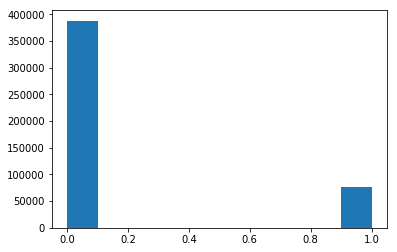

In [233]:
test_pred = np.round(predicted_cat, decimals=0)
plt.hist(test_pred)

In [234]:
test_pred = test_pred.reshape((len(test_pred),1))
test_pred = np.concatenate((test_pred, test_pred, test_pred), axis=1).reshape((img_BGR.shape[0], img_BGR.shape[1], 3))

In [235]:
new_image = np.multiply(img_BGR, test_pred)

In [236]:
#resized = cv2.resize(new_image, (0,0), fx=0.5, fy=0.5)

cv2.imshow('t1', new_image.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

(array([381240.,   3221.,   1415.,   1115.,    869.,    772.,    842.,
           877.,   1192.,  72498.]),
 array([1.02221863e-17, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

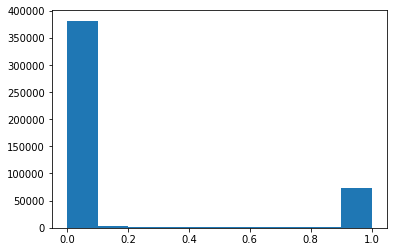

In [237]:
plt.hist(predicted_cat)